# Math 352 Midterm
### Kaetlyn Gibson
### Math 352

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

The data file prob-1.csv contains 320 datapoints, each of which is a point in $\mathbb{R}^8$.  

To make this file, I started with a 2-dimensional cloud of points $(x_0,y_0), \ldots, (x_{320}, y_{320})$ in the shape of a happy face.  I then appended 6 small random-ish numbers to each point $(x_i, y_i)$, getting a point in $\mathbb{R}^8$.  For most of the points, the random numbers I appended were all much smaller than $|x_i|$ or $|y_i|$.  So, for instance, maybe one of the resulting points was something like $$(x_1, y_1, 0.2351231, 0.9539321, 0.0048348, 0.0083756, 0.0048485, 0.00171848),$$ with $x_1$ and $y_1$ being about 30 or 40 or so.

At this point I have a thin point cloud in $\mathbb{R^8}$ in the shape of a happy face.  The last thing that I did was to choose a random 8 by 8 orthogonal matrix $M$, and to multiply each of the data points by $M$ (thereby randomly rotating the point cloud in $\mathbb{R}^8$; I used the same $M$ on all the points).

Show me as close to the original happy face image as you can.


In [2]:
x = pd.read_csv("prob-1.csv", names=["x1", "y1", "p1", "p2", "p3", "p4", "p5", "p6"])
x

,x1,y1,p1,p2,p3,p4,p5,p6
0,0.740496,-11.984888,-10.320317,5.092077,-2.916565,0.212914,-3.252841,-3.002000
1,0.781281,-11.539900,-10.070842,4.840060,-2.913187,0.704809,-3.061738,-3.284275
2,0.841752,-1.410860,-8.706634,-2.987361,-0.620941,10.343211,-1.772483,-7.859908
3,0.886806,-0.962012,-8.460194,-3.236903,-0.616283,10.831301,-1.579448,-8.145543
4,0.863873,-12.326494,-9.250175,5.769631,-3.238827,-0.299384,-2.718970,-2.922029
...,...,...,...,...,...,...,...,...
315,0.237722,6.930973,0.866042,-3.180027,-0.719419,4.894977,1.100547,-0.040213
316,0.382386,7.349438,1.503886,-3.218791,-0.930154,5.487740,1.569412,-0.485510
317,0.565105,7.744311,2.339891,-3.159520,-1.250978,6.138693,2.181171,-1.003545
318,0.611201,8.189303,2.584938,-3.412760,-1.244363,6.628758,2.381430,-1.284626


In [3]:
# present data as an array/matrix
x1 = x["x1"]
y1 = x["y1"]
p1 = x["p1"]
p2 = x["p2"]
p3 = x["p3"]
p4 = x["p4"]
p5 = x["p5"]
p6 = x["p6"]

A = np.array([x1, y1, p1, p2, p3, p4, p5, p6])
A = A.T  # transpose so data appears correct 
print(A)

[[  0.74049583 -11.98488791 -10.32031726 ...   0.21291405  -3.25284132
   -3.00200004]
 [  0.78128122 -11.53990021 -10.07084224 ...   0.70480851  -3.0617376
   -3.28427474]
 [  0.84175177  -1.41085997  -8.70663396 ...  10.34321102  -1.77248285
   -7.85990757]
 ...
 [  0.56510487   7.74431057   2.33989077 ...   6.13869302   2.18117143
   -1.00354458]
 [  0.61120127   8.189303     2.58493792 ...   6.62875758   2.38143033
   -1.28462629]
 [  0.6615434    8.63619938   2.83536461 ...   7.11722598   2.56711361
   -1.56983701]]


In [4]:
# perform singular value decomposition
data = np.linalg.svd(A, full_matrices=True)
U = data[0]
S = data[1]
VT = data[2]

print(f"U: \n{U}\n")
print(f"Sigma: \n{S}\n")
print(f"V^T: \n{VT}\n")

U: 
[[ 0.05478055  0.11995044  0.07938789 ... -0.04935334 -0.02684509
  -0.05199532]
 [ 0.0507735   0.12016394  0.07244583 ...  0.07983207  0.10073746
   0.09313489]
 [-0.03626253  0.12598111  0.07870939 ...  0.02422358  0.05217491
   0.04076889]
 ...
 [-0.05231275 -0.01062341 -0.05450977 ...  0.96510413 -0.02314754
  -0.03070307]
 [-0.0563198  -0.01040982 -0.06145176 ... -0.02378295  0.95245408
  -0.02653226]
 [-0.06032686 -0.01019628 -0.06839378 ... -0.03125641 -0.02750773
   0.96545566]]

Sigma: 
[1.94296401e+02 1.12306323e+02 3.97730983e+01 2.58622679e+01
 8.69163972e-02 5.27524448e-02 5.06878155e-02 4.74291257e-02]

V^T: 
[[-0.00247223 -0.61682575 -0.1086974   0.45928468 -0.13322017 -0.55479187
  -0.08615151  0.25258388]
 [ 0.09271098 -0.42560316 -0.52890558  0.09908029 -0.18926608  0.4916933
  -0.06616095 -0.48861783]
 [-0.14609414  0.12167144 -0.66035083 -0.34114475  0.29354791 -0.14479616
  -0.45356922  0.31392397]
 [-0.1010659  -0.36566039  0.24658592 -0.26352082  0.65106141 -

In [5]:
# check to make sure AV = US
V = VT.T
AV = np.matmul(A, V)
US = U[:, :8] * S
np.allclose(AV, US) 

True

In [6]:
# project data so we isolate the x and y pts
P = np.array([[1, 0], [0, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]])
PUS = np.matmul(US, P)
print(PUS)

[[ 1.06436643e+01  1.34711932e+01]
 [ 9.86510750e+00  1.34951704e+01]
 [-7.04567842e+00  1.41484756e+01]
 [-7.82423525e+00  1.41724571e+01]
 [ 1.13502955e+01  1.28638517e+01]
 [ 1.05717387e+01  1.28878301e+01]
 [ 9.79318179e+00  1.29118140e+01]
 [ 9.00427007e+00  1.29298115e+01]
 [-6.41153487e+00  1.34992305e+01]
 [-7.19009173e+00  1.35232136e+01]
 [-7.96864837e+00  1.35471982e+01]
 [-8.74720497e+00  1.35711835e+01]
 [ 1.19533731e+01  1.21966567e+01]
 [ 1.11748164e+01  1.22206379e+01]
 [ 1.03962599e+01  1.22446224e+01]
 [ 9.61770321e+00  1.22686043e+01]
 [ 8.83914651e+00  1.22925885e+01]
 [ 8.06058950e+00  1.23165655e+01]
 [-5.77739114e+00  1.28499938e+01]
 [-6.30219894e+00  1.29390497e+01]
 [-7.13253201e+00  1.29331085e+01]
 [-7.92144409e+00  1.29511040e+01]
 [-8.72071115e+00  1.29631201e+01]
 [-9.49926818e+00  1.29870964e+01]
 [ 1.27480679e+01  1.15586176e+01]
 [ 1.19488009e+01  1.15706368e+01]
 [ 1.11598889e+01  1.15886308e+01]
 [ 1.03295559e+01  1.15826934e+01]
 [ 9.80474763e+00  1

In [7]:
# get matrix VP
VP = np.matmul(V, P)
VP

array([[-0.00247223,  0.09271098],
       [-0.61682575, -0.42560316],
       [-0.1086974 , -0.52890558],
       [ 0.45928468,  0.09908029],
       [-0.13322017, -0.18926608],
       [-0.55479187,  0.4916933 ],
       [-0.08615151, -0.06616095],
       [ 0.25258388, -0.48861783]])

In [8]:
# multiply VP by some length-8 row input vector
aVPs = []
for row in A:
    aVP = np.matmul(row, VP)
    aVPs.append(aVP)

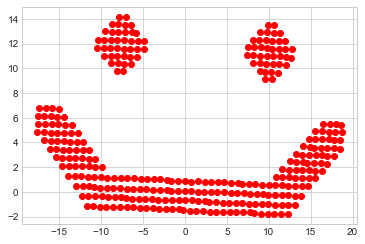

In [9]:
# plot data
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

x = np.array([aVPs[i][0] for i in range(len(aVPs))])
y = np.array([aVPs[i][1] for i in range(len(aVPs))])

# Plotting
plt.scatter(x, y,color='r',marker='o')
plt.show()

YES! >:)

-> Basically followed steps from the Animal Crossing problem.

## Problem 2


Use the Gauss-Siedel iterative method to solve the system $Ax=b$, where $A$ and $b$ are as defined below.  Compare the result with one of numpy's built-in solvers.  



Based on algorithm from: https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method

In [108]:
def Gauss_Siedel(A, b):
    # we know that A is a square matrix in this case
    n = A.shape[0]
    x = np.zeros(n)
    for i in range(n):
        p = 0
        for j in range(n):
            if i != j:
                p += A[i][j] * x[j]
        x[i] = (b[i] - p) / A[i][i]
    return x


In [109]:
M = np.array([[1.034e+01, 6.300e-01, 3.400e-01, 2.700e-01, 1.200e-01, 1.800e-01],
       [8.200e-01, 1.037e+01, 7.200e-01, 9.600e-01, 6.000e-02, 1.000e-02],
       [5.100e-01, 3.100e-01, 1.090e+01, 2.600e-01, 4.800e-01, 3.000e-01],
       [8.000e-01, 2.500e-01, 7.700e-01, 1.066e+01, 5.800e-01, 5.100e-01],
       [3.900e-01, 2.900e-01, 3.700e-01, 5.000e-01, 1.015e+01, 5.000e-02],
       [7.800e-01, 1.000e+00, 8.200e-01, 8.000e-01, 1.000e-02, 1.050e+01]])
b = np.array([ 35.5 ,  17.06,  50.8 ,  23.88,  54.64, 101.97])

In [110]:
Gauss_Siedel(M, b)

array([3.43326886, 1.37364701, 4.46084425, 1.62806033, 4.9692734 ,
       8.84841619])

In [111]:
np.linalg.solve(M, b)

array([3., 1., 4., 1., 5., 9.])

It looks like there is some roundoff going on here!

## Problem 3

Consider the system $Ax = b$, where $b$ is the all-ones vector of length 10000, and $A = [a_{ij}]$ is the 10000 by 10000 matrix whose entries are 
$$a_{ij} = \begin{cases}
3 & \text{if }i = j-1,\\
17 & \text{if }i = j,\\
4 & \text{if }i=j+1,\\
0 & \text{otherwise.}
\end{cases}
$$
Solve this system.  I'm not going to look at all 10000 entries of $x$ - just report the first coordinate of $x$.  If you get that right I'll assume the other 10000 are right.  It's not going to be an integer or anything, it'll be some decimal.

Should we be concerned about round-off error with this solution?



In [131]:
# Make matrix A 
n = 10000
A = np.zeros((n, n)) # create a matrix full of zeros 
for i in range(n):
    for j in range(n):
        # replace with correct numbers
        if i == j-1:
            A[i][j] = 3
        elif i == j:
            A[i][j] = 17
        elif i == j+1:
            A[i][j] = 4

#  Get vector b:
b = np.ones(n)

# Solve for x
x = np.linalg.solve(A, b)
print(x[0])

0.05191545349819428


I think that we should be concerned about round-off error since we are dealing with floating point numbers (and numpy's built in solve).

## Problem 4

Consider the matrix of Problem 3.  Find a way to approximate the condition number of $M$.  The matrix in this problem is probably too large to just ask numpy for the condition number - instead, numerically approximate the largest and smallest singular values of $M$.


Suppose that I told you that the value of $b$ I gave you, the all-ones vector, might have an error of at most $\pm 0.0001$ *in each coordinate*.  Give an upper bound on how far off the value of $x$ could be from the true value (in norm).





Based on a definition of condition number and what p (order of the norms) means: https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html

In [178]:
# Make matrix A 
n = 1000 # smaller matrix to be faster
A = np.zeros((n, n)) # create a matrix full of zeros 
for i in range(n):
    for j in range(n):
        # replace with correct numbers
        if i == j-1:
            A[i][j] = 3
        elif i == j:
            A[i][j] = 17
        elif i == j+1:
            A[i][j] = 4

#  Get vector b:
b = np.ones(n)

# Solve for x
x1 = np.linalg.solve(A, b)

In [151]:
# Approximate condition number of A (largest singular value -> order 2)

# Get norm of matrix A
nA = np.linalg.norm(A, 2)
print(f"norm of A: {nA}")

# Get norm of inverse of matrix A
Ai = np.linalg.inv(A)
nAi = np.linalg.norm(Ai, 2)
print(f"norm of inverse A: {nAi}")

# Condition number = norm(A) * norm(inverse A)
k =  nA * nAi
print(f"condition number: {k}")

norm of A: 23.99996573025835
norm of inverse A: 0.0999996503431955
condition number: 2.3999881812745096


In [152]:
# Approximate condition number of A (smallest singular value -> order -2)

# Get norm of matrix A
nA = np.linalg.norm(A, -2)
print(f"norm of A: {nA}")

# Get norm of inverse of matrix A
Ai = np.linalg.inv(A)
nAi = np.linalg.norm(Ai, -2)
print(f"norm of inverse A: {nAi}")

# Condition number = norm(A) * norm(inverse A)
k =  nA * nAi
print(f"condition number: {k}")

norm of A: 10.00003496580271
norm of inverse A: 0.041666726162830875
condition number: 0.41666871853883536


---

In [189]:
# Find upper bound on how far off the value of x could be from the true value (testing all +0.0001 and all -0.0001)

#  Get vector b (by adding error in coordinates):
b2 = np.ones(n)
b3 = np.ones(n)

for i in range(n): 
    b2[i] += 0.0001
    b3[i] += -0.0001
        
# Solve for x
x2 = np.linalg.solve(A, b2)
x3 = np.linalg.solve(A, b3)

In [192]:
nX1 = np.linalg.norm(x1, 2)
nX2 = np.linalg.norm(x2, 2)
nX3 = np.linalg.norm(x3, 2)

err1 = abs(nX2 - nX1)
err2 = abs(nX3 - nX1)

print(f"norm of x(true value): {nX1}")
print(f"norm of x(w/ error value +0.0001): {nX2}")
print(f"norm of x(w/ error value -0.0001): {nX3}")
print(f"error 1: {err1}")
print(f"error 2: {err2}")
print(f"upper bound: {max(err1, err2)}")

norm of x(true value): 1.318146549542182
norm of x(w/ error value +0.0001): 1.3182783641971356
norm of x(w/ error value -0.0001): 1.3180147348872278
error 1: 0.00013181465495359923
error 2: 0.00013181465495426536
upper bound: 0.00013181465495426536


I think this is what you meant, anyways.